<a href="https://colab.research.google.com/github/mdhasanali3/yolov5-webcam/blob/main/yolox_brand_a(hasan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/roboflow-ai/YOLOX.git
%cd YOLOX
!pip3 install -U pip 
!pip3 install -r requirements.txt
!pip3 install -v -e .  

!pip install tensorflowjs
!pip install onnx-tf

!wget https://github.com/Megvii-BaseDetection/storage/releases/download/0.0.1/yolox_s.pth


import torch
%cd /content/
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
!pip3 install cython; pip3 install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
#!pip uninstall -y torch torchvision torchaudio
# May need to change in the future if Colab no longer uses CUDA 11.0
#!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Cloning into 'YOLOX'...
remote: Enumerating objects: 786, done.
remote: Total 786 (delta 0), reused 0 (delta 0), pack-reused 786
Receiving objects: 100% (786/786), 5.77 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/YOLOX
     |████████████████████████████████| 1.7 MB 8.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 57 kB 3.9 MB/s             
     |████████████████████████████████| 108 kB 19.1 MB/s            
     |████████████████████████████████| 14.5 MB 81.6 MB/s            
     |████████████████████████████████| 4.5 MB 68.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 466 kB 91.8 MB/s            
  Created wheel for onnx-simplifier: filename=onnx_simplifier-0.3.5-py3-none-any.whl size=12878 sha256=650aa07d85d10a91f3a812f35d8b4f6ff24a891bbf2a1ade295538854922c1

In [2]:
#to get your roboflow code below please follow the link output by this cell
!pip -q install roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="voc", notebook="yolox")

%cd /content/
rf = Roboflow(api_key="nnkeyY")
project = rf.workspace().project(input())
dataset = project.version(input()).download("voc")

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 145 kB 6.9 MB/s            
     |████████████████████████████████| 178 kB 97.0 MB/s            
     |████████████████████████████████| 1.1 MB 98.7 MB/s            
     |████████████████████████████████| 67 kB 7.9 MB/s             
     |████████████████████████████████| 138 kB 86.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 596 kB 82.3 MB/s            
     |████████████████████████████████| 63 kB 2.1 MB/s             
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 

Extracting Dataset Version Zip to pro2-2 in voc:: 100%|██████████| 6345/6345 [00:00<00:00, 7005.17it/s]


In [3]:
%cd YOLOX/
!ln -s {dataset.location}/train/ ./datasets/VOCdevkit

/content/YOLOX


In [4]:
%mkdir "/content/YOLOX/datasets/VOCdevkit/VOC2007"
!python3 voc_txt.py "/content/YOLOX/datasets/VOCdevkit/"
%mkdir "/content/YOLOX/datasets/VOCdevkit/VOC2012"
!cp -r "/content/YOLOX/datasets/VOCdevkit/VOC2007/." "/content/YOLOX/datasets/VOCdevkit/VOC2012"

train and val size: 2608
train size: 2086


In [5]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [6]:
##REPLACE this cell with your classnames stripped of whitespace and lowercase
%%writetemplate /content/YOLOX/yolox/data/datasets/voc_classes.py

VOC_CLASSES = (
  "pa1",
  "pa2",
  "pa3"
)

In [7]:
##REPLACE this cell with your classnames stripped of whitespace and lowercase
%%writetemplate /content/YOLOX/yolox/data/datasets/coco_classes.py

COCO_CLASSES = (
  "pa1",
  "pa2",
  "pa3"
)

In [8]:
NUM_CLASSES = 3
!sed -i -e 's/self.num_classes = 20/self.num_classes = {NUM_CLASSES}/g' "/content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py"

In [9]:
%cp -r /content/YOLOX/datasets /content/YOLOX/tools
%cp -r /content/YOLOX/yolox /content/YOLOX/tools

In [13]:
!python tools/train.py -f exps/example/yolox_voc/yolox_voc_s.py -d 1 -b 32 --fp16 -o -c /content/YOLOX/yolox_s.pth

Streaming output truncated to the last 5000 lines.
AP for pa3 = 0.7783
Mean AP = 0.8177
~~~~~~~~
Results:
0.841
0.834
0.778
0.818
~~~~~~~~

--------------------------------------------------------------
Results computed with the **unofficial** Python eval code.
Results should be very close to the official MATLAB eval code.
Recompute with `./tools/reval.py --matlab ...` for your paper.
-- Thanks, The Management
--------------------------------------------------------------
Eval IoU : 0.55
Eval IoU : 0.60
Eval IoU : 0.65
Eval IoU : 0.70
Eval IoU : 0.75
Eval IoU : 0.80
Eval IoU : 0.85
Eval IoU : 0.90
Eval IoU : 0.95
--------------------------------------------------------------
map_5095: 0.5287557992712086
map_50: 0.8176726684991925
--------------------------------------------------------------
2022-01-05 09:34:10 | INFO     | yolox.core.trainer:314 - 
Average forward time: 4.08 ms, Average NMS time: 2.27 ms, Average inference time: 6.35 ms

2022-01-05 09:34:10 | INFO     | yolox.core.tra

In [14]:
MODEL_PATH = "/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar"
!python3 tools/eval.py -n  yolox-s -c {MODEL_PATH} -b 64 -d 1 --conf 0.1 -f exps/example/yolox_voc/yolox_voc_s.py

2022-01-05 14:33:06 | INFO     | __main__:129 - Args: Namespace(batch_size=64, ckpt='/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar', conf=0.1, devices=1, dist_backend='nccl', dist_url=None, exp_file='exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=False, fuse=False, local_rank=0, machine_rank=0, name='yolox-s', nms=None, num_machines=1, opts=[], seed=None, speed=False, test=False, trt=False, tsize=None)
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2022-01-05 14:33:06 | INFO     | __main__:139 - Model Summary: Params: 8.94M, Gflops: 26.64
2022-01-05 14:33:06 | INFO     | __main__:140 - Model Structure:
YOLOX(
  (backbone): YOLOPAFPN(
    (backbone): CSPDarknet(
      (stem): Focus(
  

In [15]:
TEST_IMAGE_PATH = "/content/pro2-2/test"
!python tools/demo.py image -f /content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py -c {MODEL_PATH} --path {TEST_IMAGE_PATH} --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu

2022-01-05 14:34:04.204 | INFO     | __main__:main:240 - Args: Namespace(camid=0, ckpt='/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar', conf=0.25, demo='image', device='gpu', exp_file='/content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=False, fuse=False, name=None, nms=0.45, path='/content/pro2-2/test', save_result=True, trt=False, tsize=640)
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2022-01-05 14:34:04.375 | INFO     | __main__:main:250 - Model Summary: Params: 8.94M, Gflops: 26.64
2022-01-05 14:34:07.231 | INFO     | __main__:main:261 - loading checkpoint
2022-01-05 14:34:07.329 | INFO     | __main__:main:265 - loaded checkpoint done.
2022-01-05 14:34:07.407 | INFO  

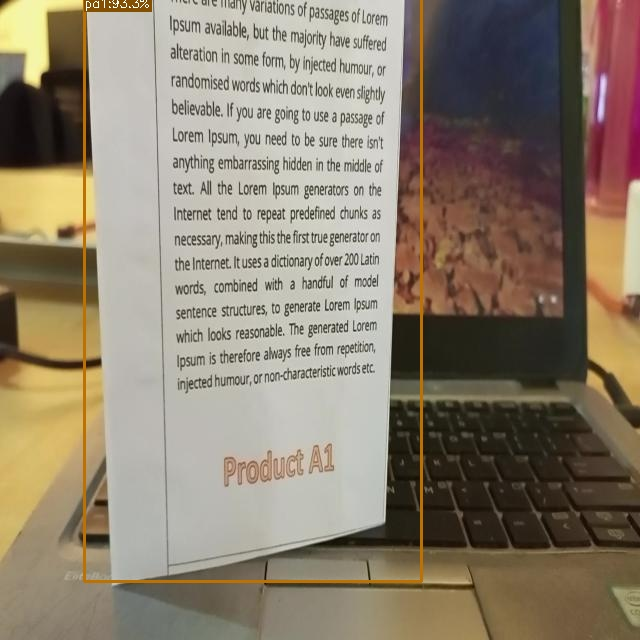

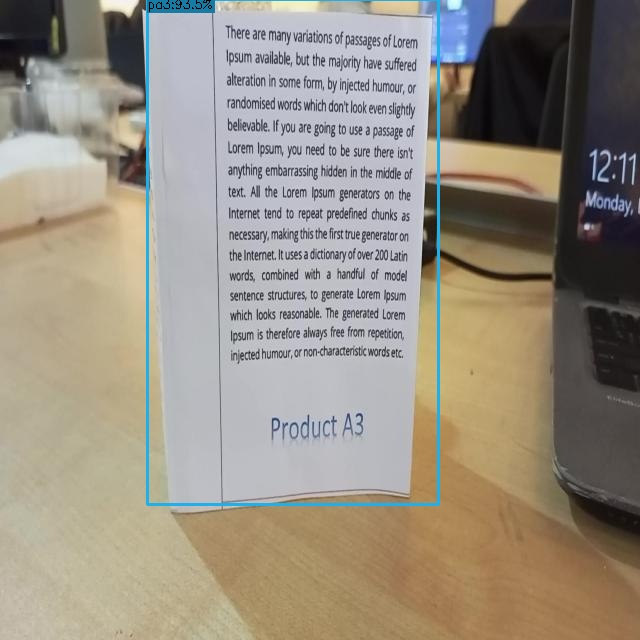

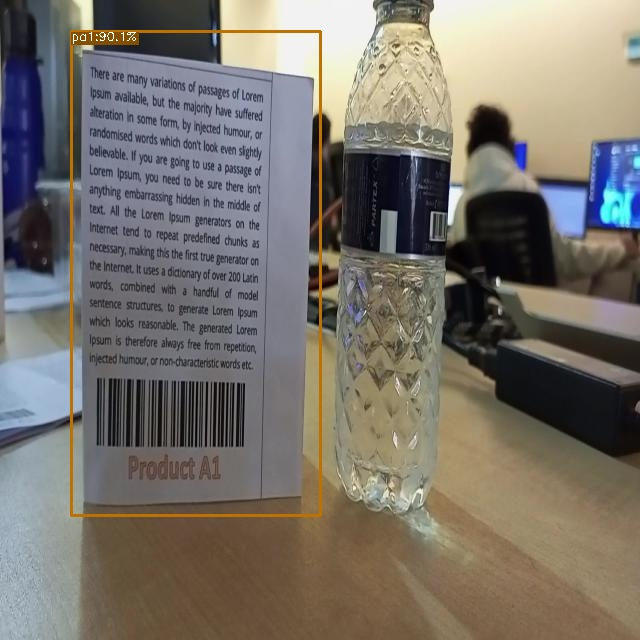

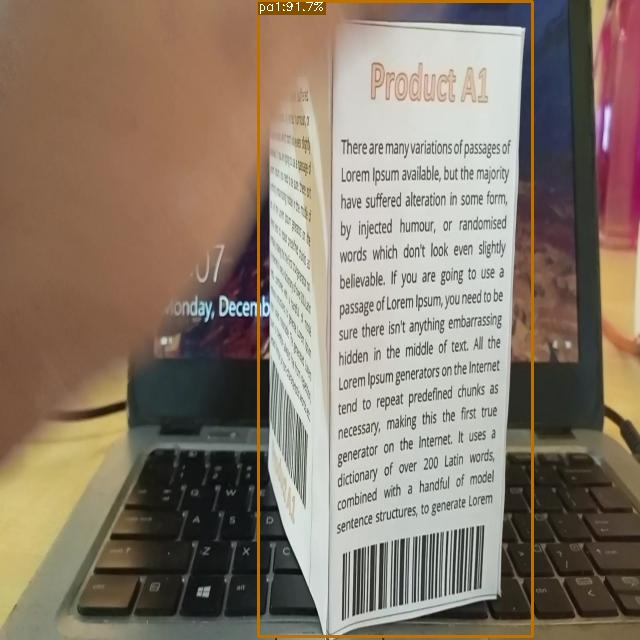

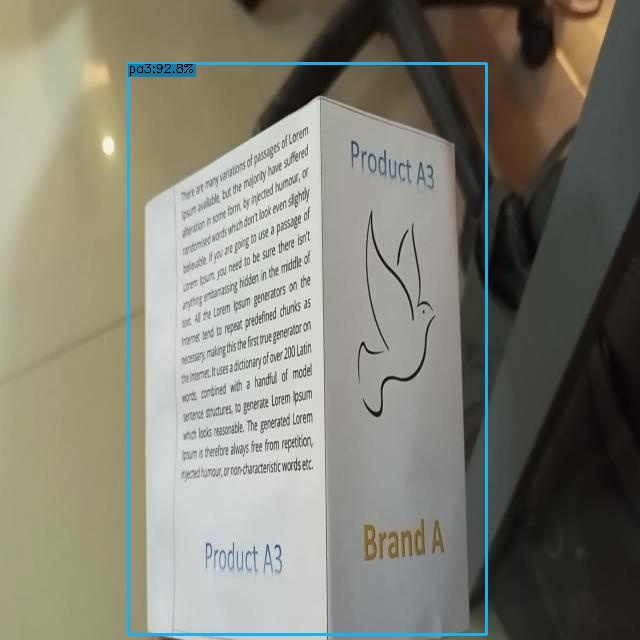

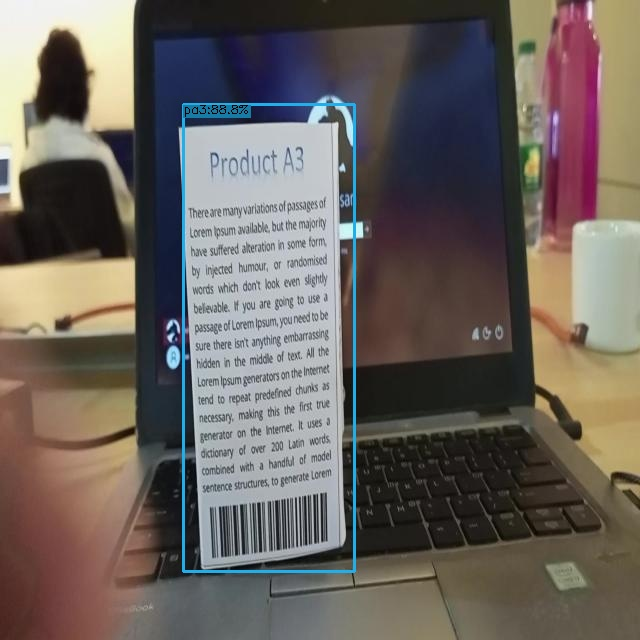

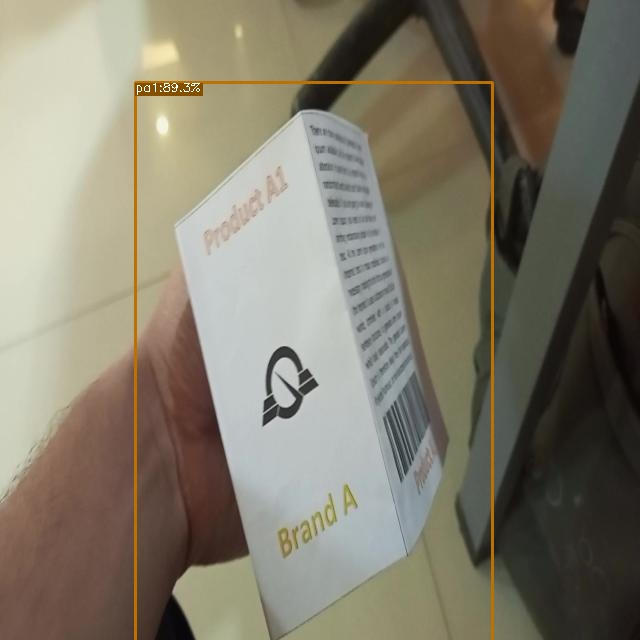

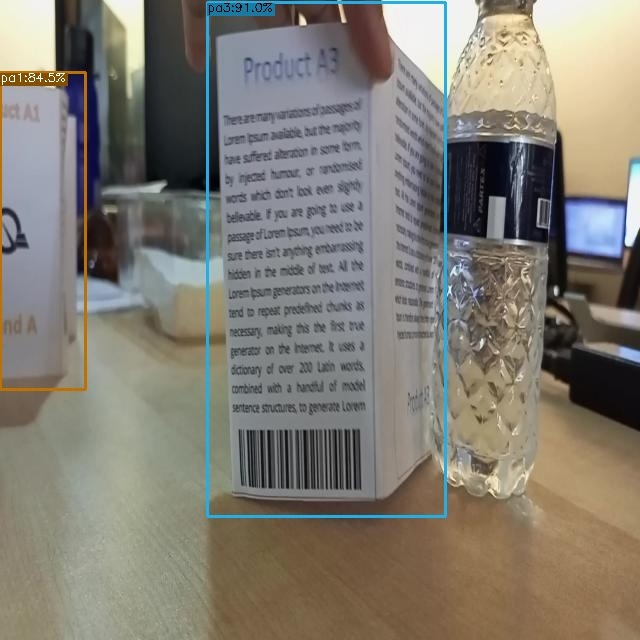

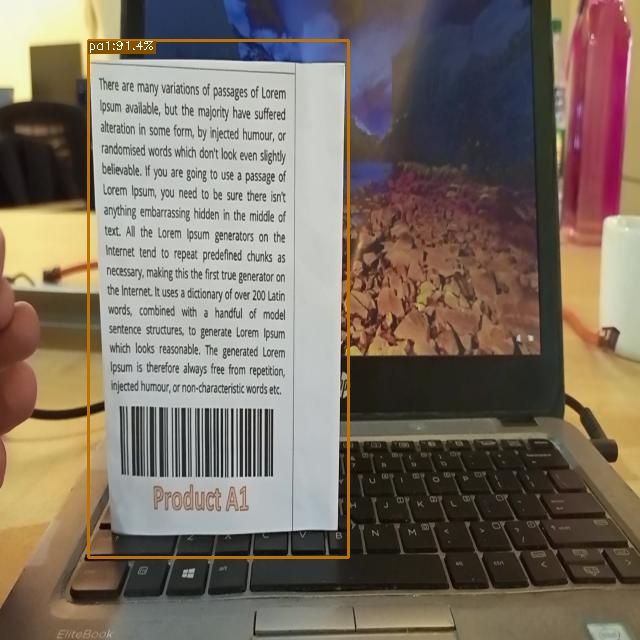

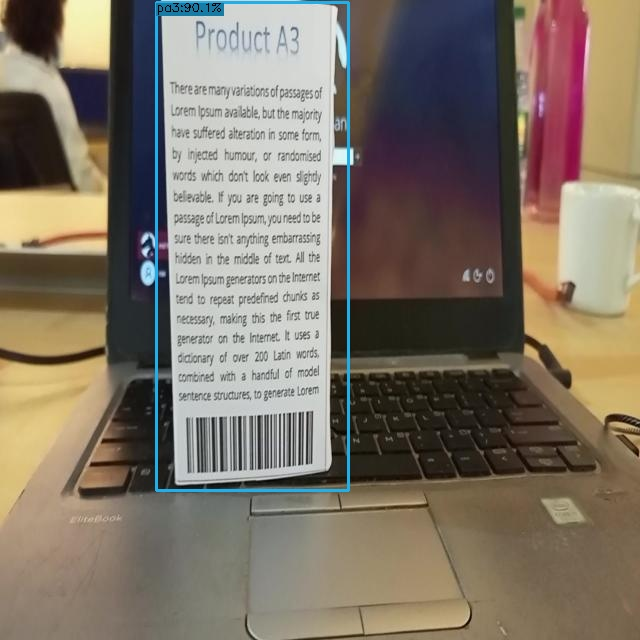

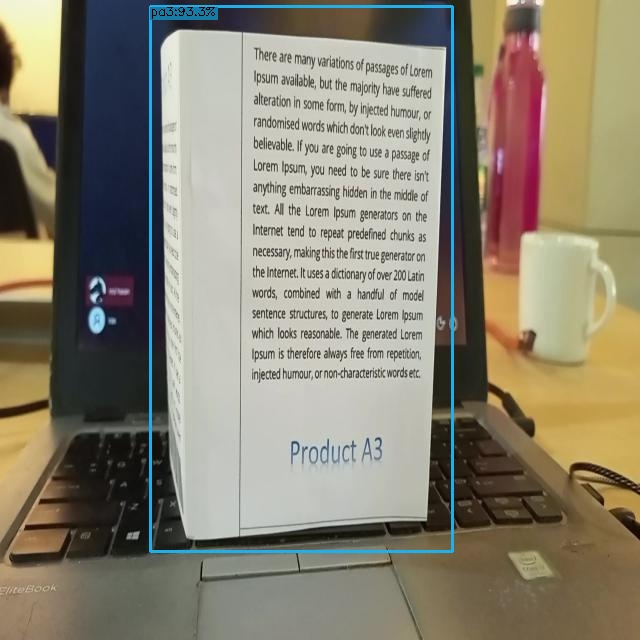

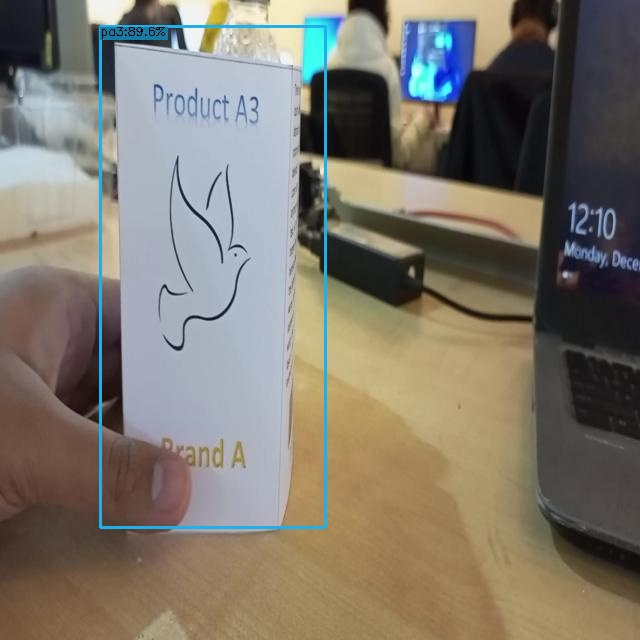

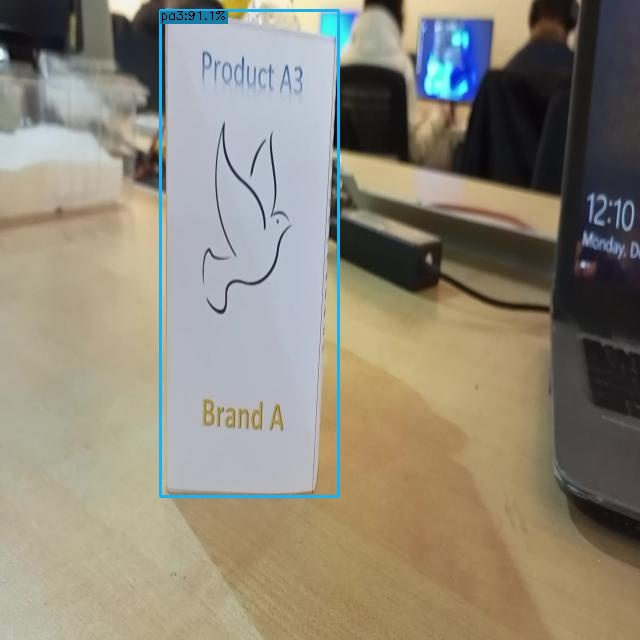

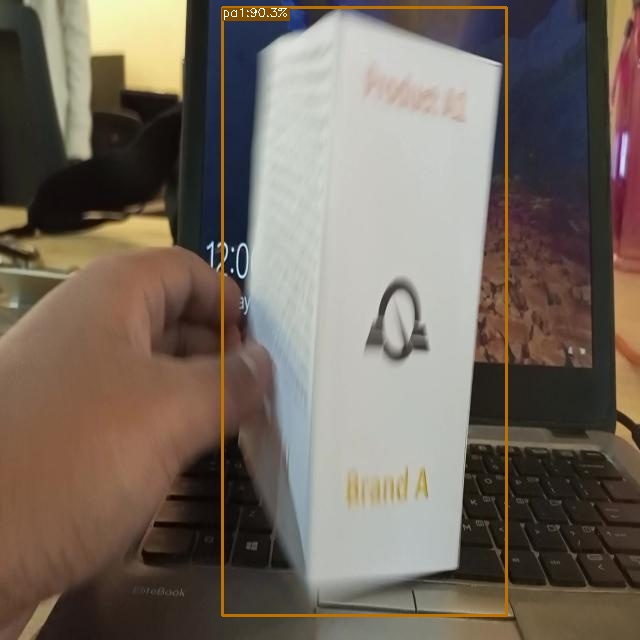

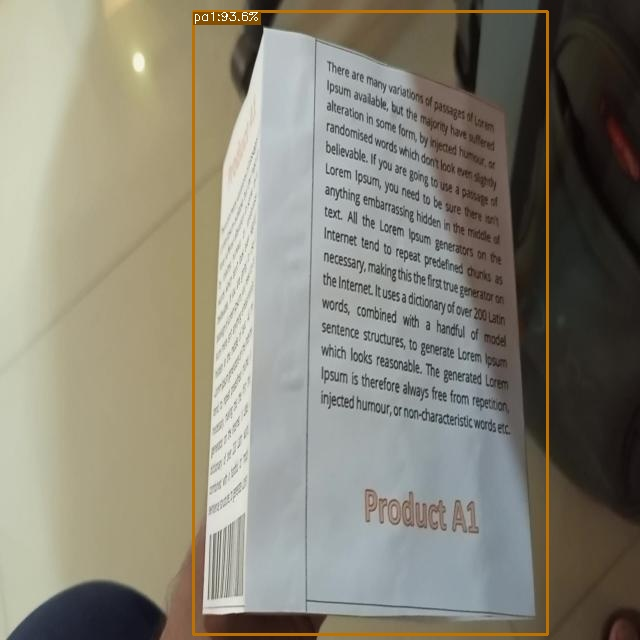

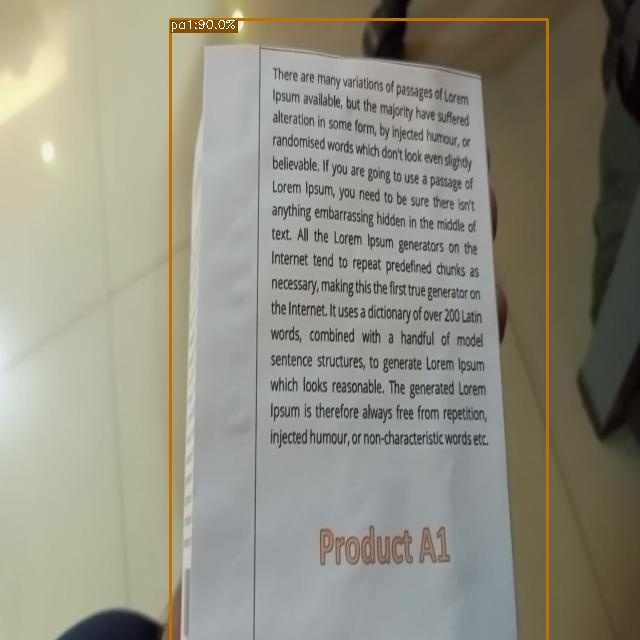

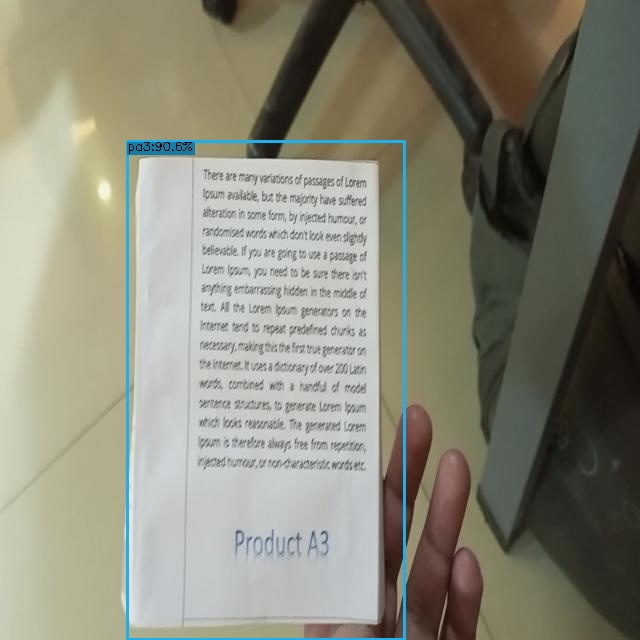

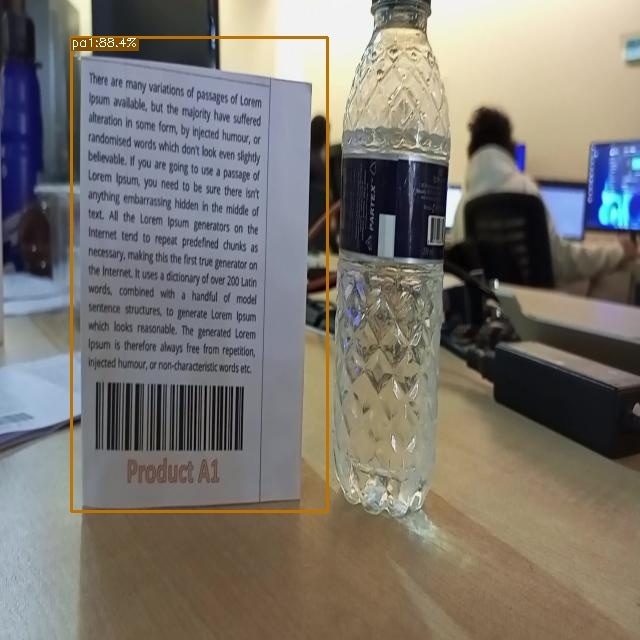

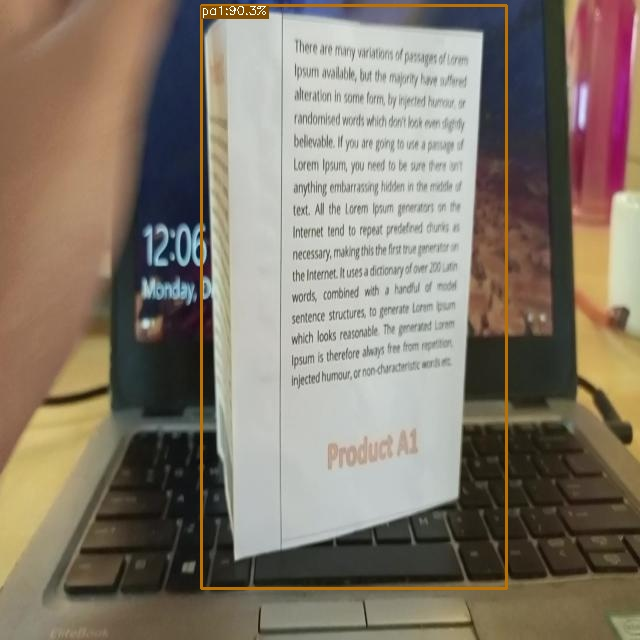

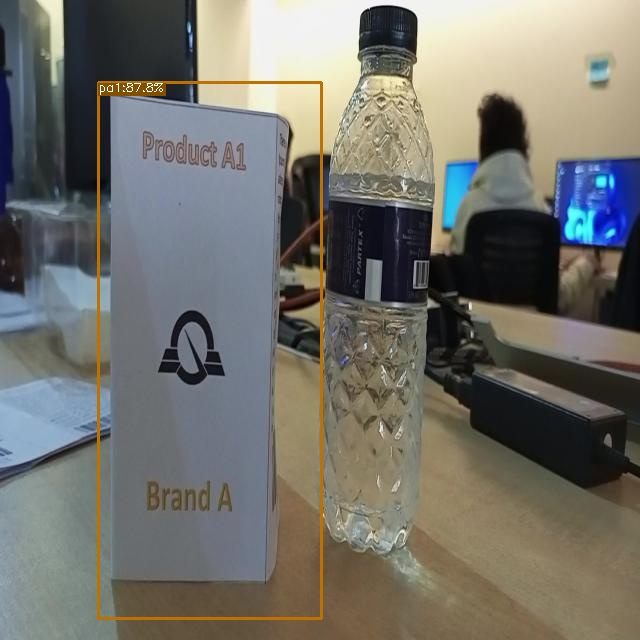

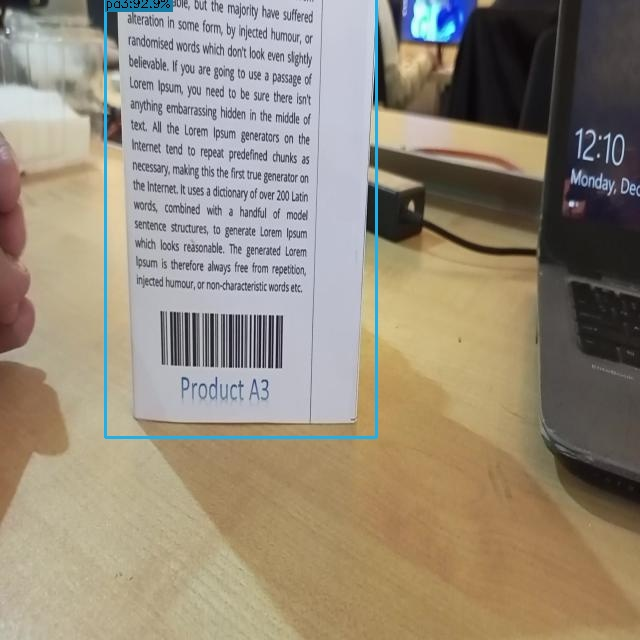

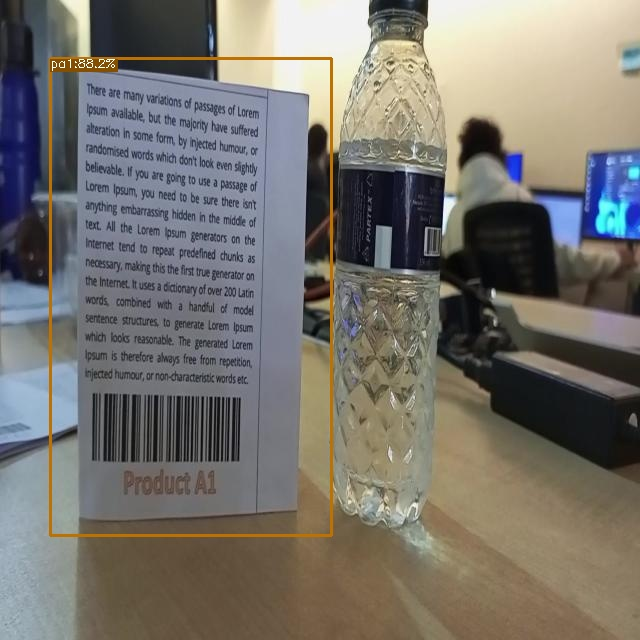

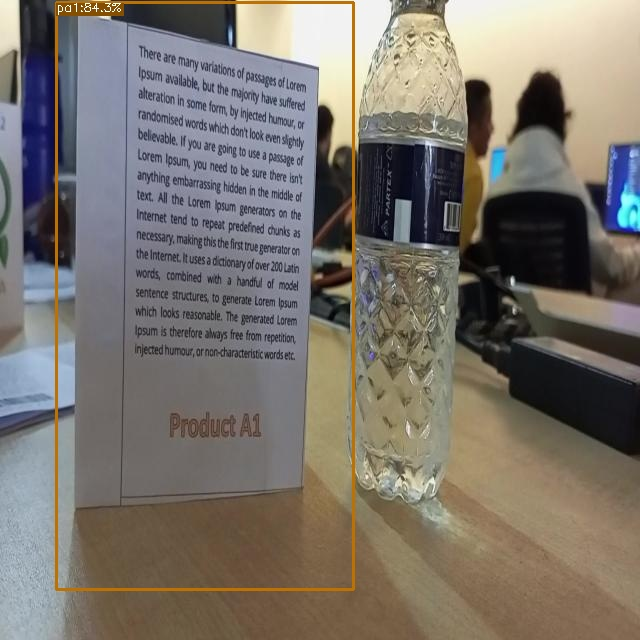

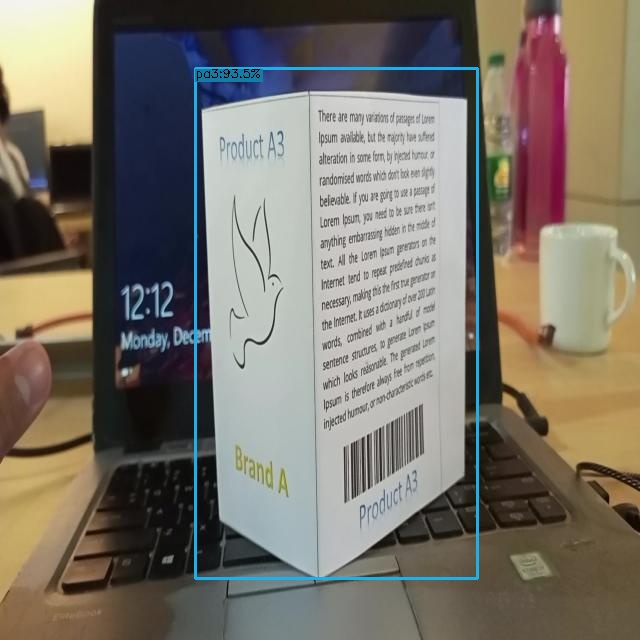

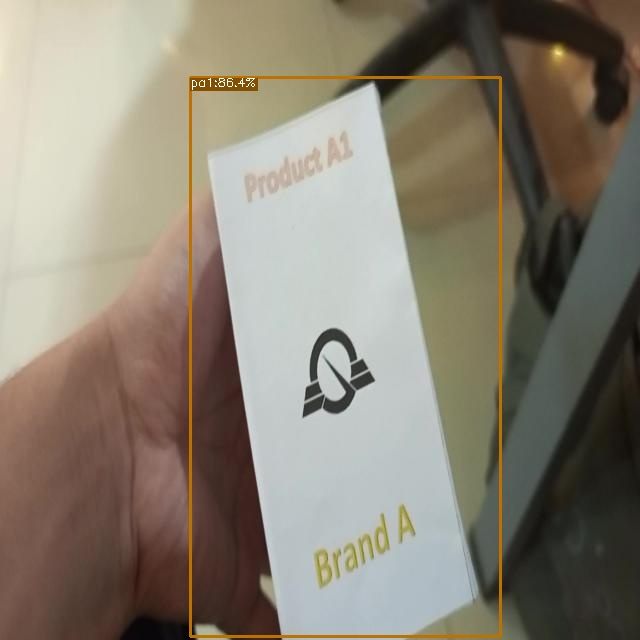

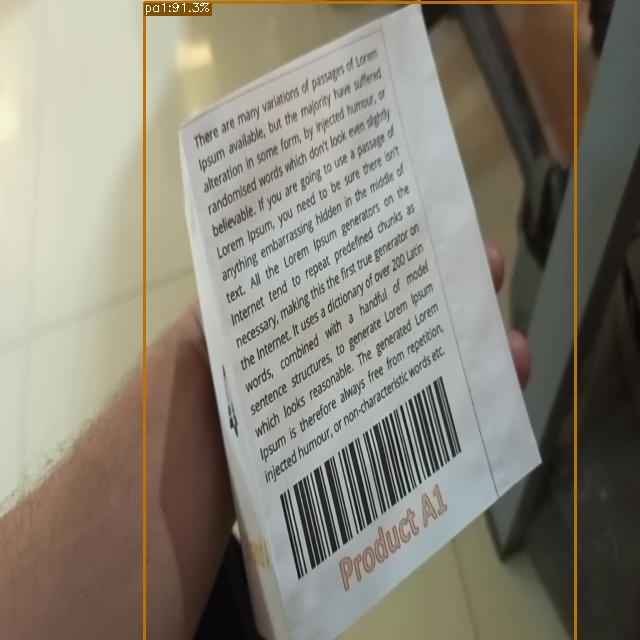

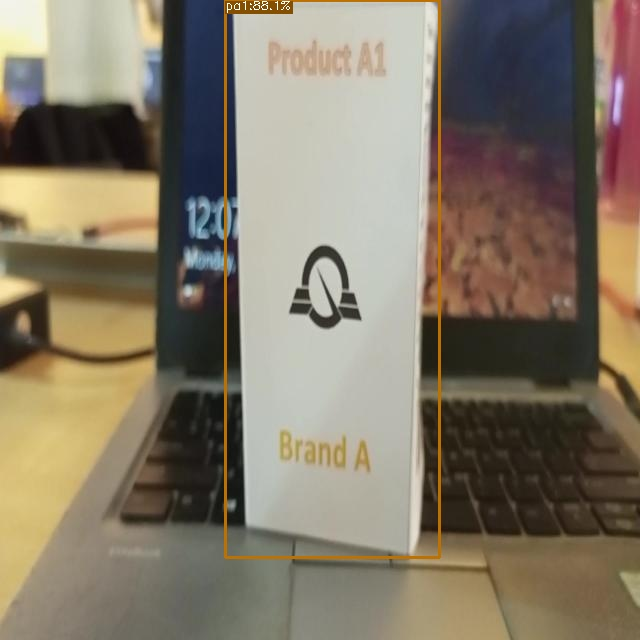

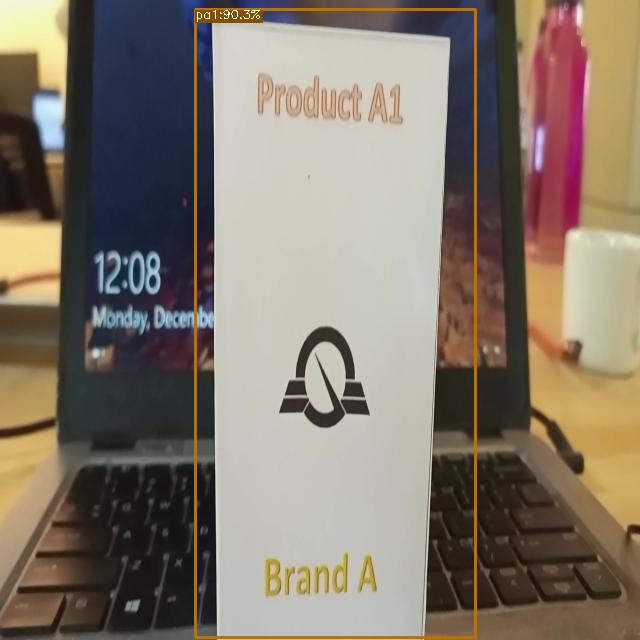

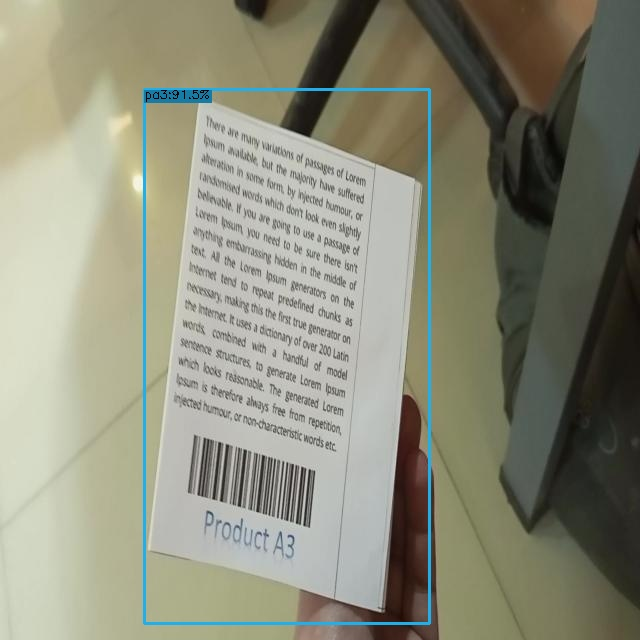

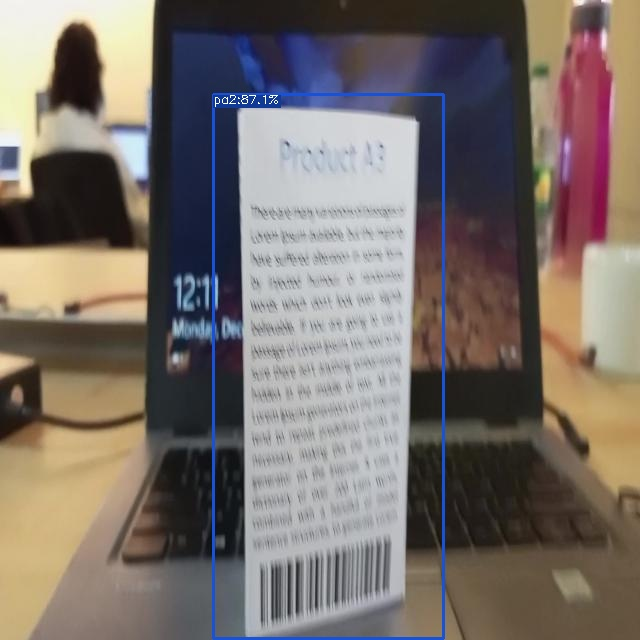

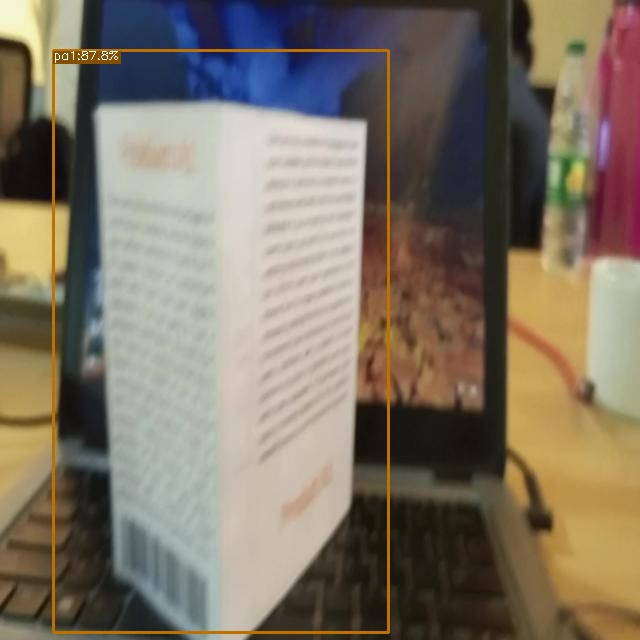

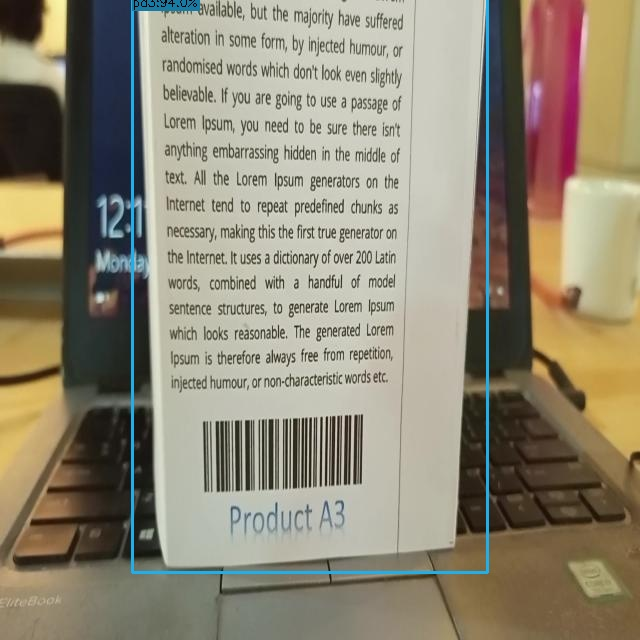

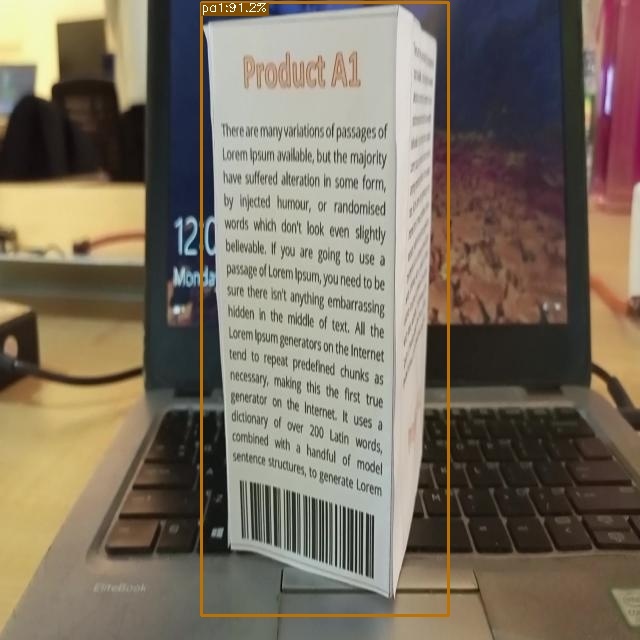

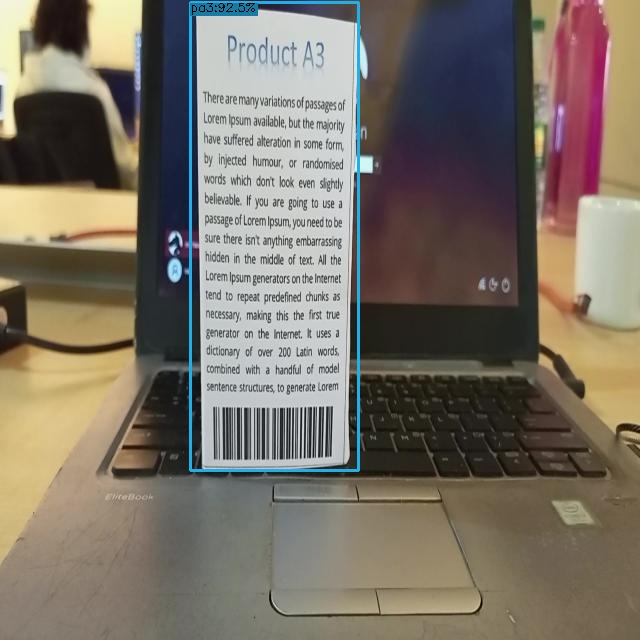

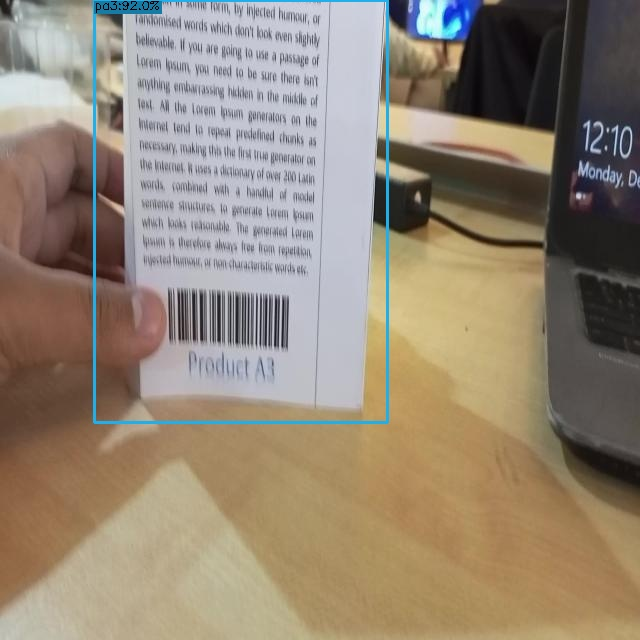

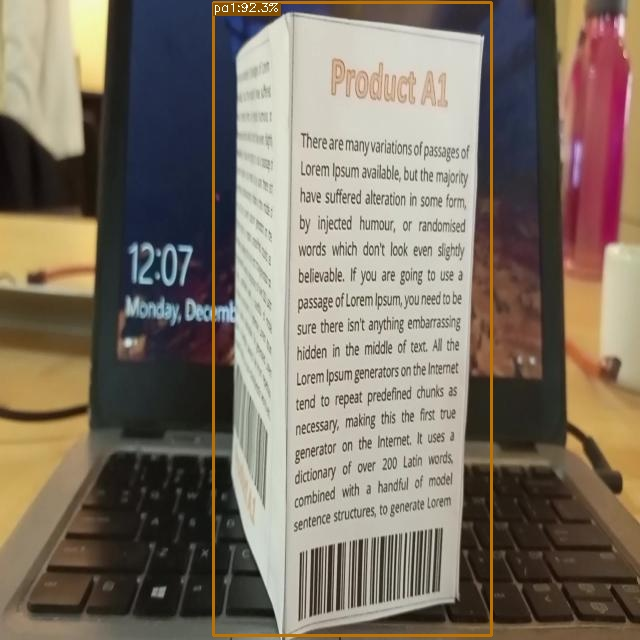

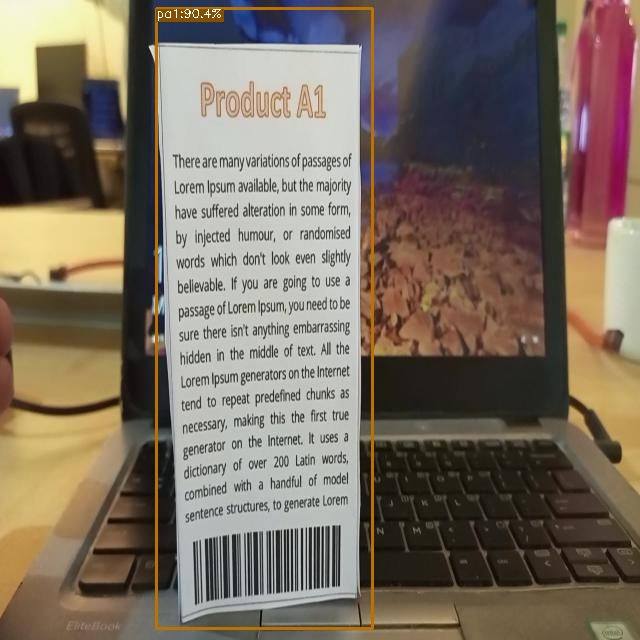

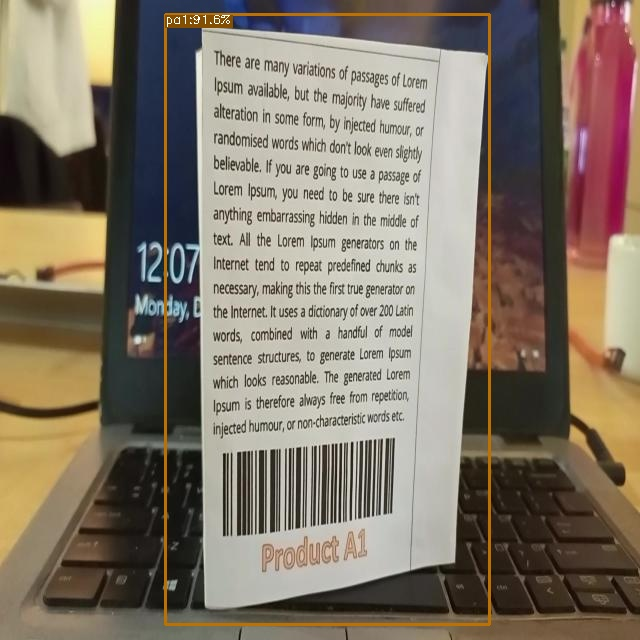

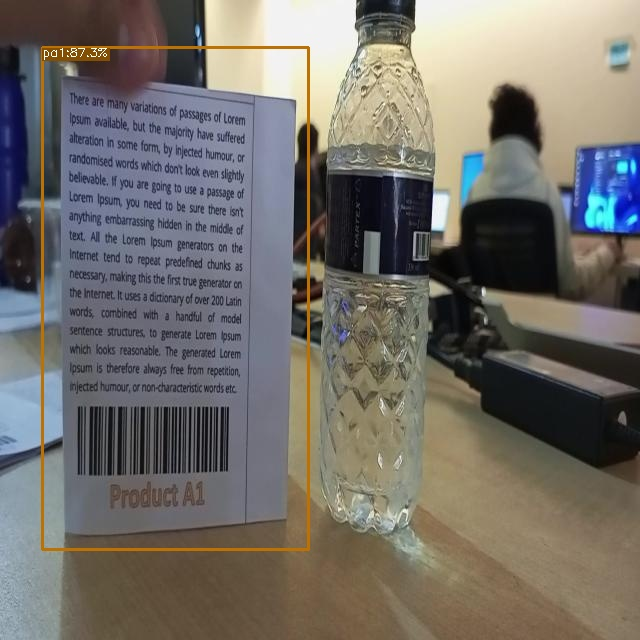

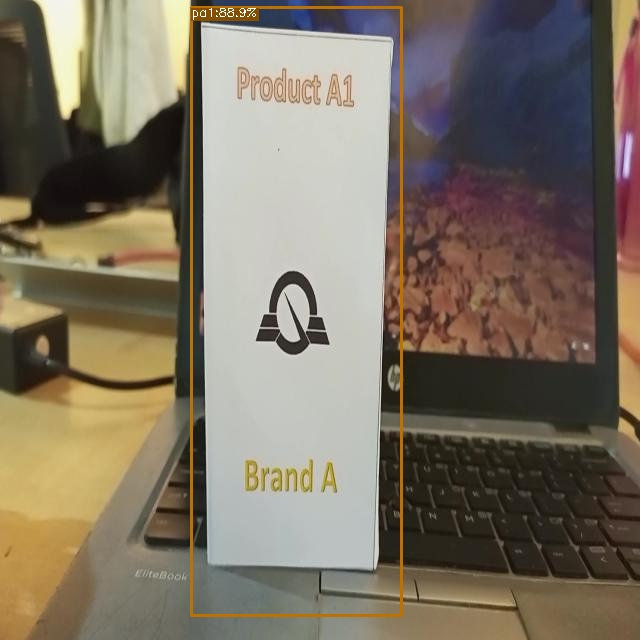

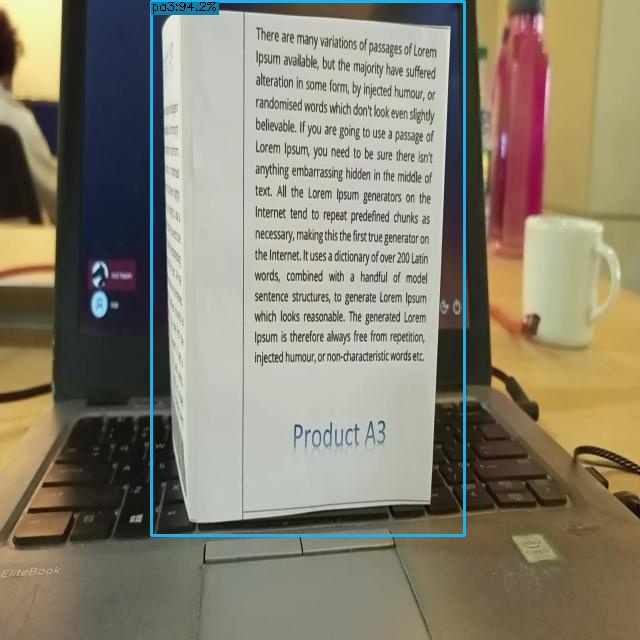

In [16]:
import glob
from IPython.display import Image, display
 
for imageName in glob.glob('/content/YOLOX/YOLOX_outputs/yolox_voc_s/vis_res/2022_01_05_14_34_07/*.jpg'): #assuming JPG
       display(Image(filename=imageName))
       print("\n")

In [17]:
!python3 tools/exportmy.py --output-name yolox_s.onnx -f /content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py -c /content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar

2022-01-05 14:36:33.725 | INFO     | __main__:main:65 - args value: Namespace(ckpt='/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar', exp_file='/content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py', experiment_name=None, input='images', name=None, no_onnxsim=False, opset=11, opts=[], output='output', output_name='yolox_s.onnx')
2022-01-05 14:36:34.315 | INFO     | __main__:main:89 - loading checkpoint done.
2022-01-05 14:36:39.222 | INFO     | __main__:main:99 - generated onnx model named yolox_s.onnx
2022-01-05 14:36:40.754 | INFO     | __main__:main:111 - generated simplified onnx model named yolox_s.onnx
2022-01-05 14:36:44.175277: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-01-05 14:36:52.724427: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so conside

In [18]:
!git clone https://github.com/mdhasanali3/yolov5-webcam.git

Cloning into 'yolov5-webcam'...
remote: Enumerating objects: 216, done.
remote: Total 216 (delta 0), reused 0 (delta 0), pack-reused 216
Receiving objects: 100% (216/216), 322.79 MiB | 27.48 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Checking out files: 100% (70/70), done.


In [19]:
pwd

'/content/YOLOX'

In [20]:
%cp -r /content/YOLOX/YOLOX_outputs/yolox_voc_s/web_model_yolox_s /content/YOLOX/yolov5-webcam/public

In [21]:
%cp -r /content/YOLOX/yolox_s_pb /content/YOLOX/yolov5-webcam/model_torch_tf_yolox_s

In [22]:
%cp -r /content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar /content/YOLOX/yolov5-webcam/model_torch_tf_yolox_s

In [24]:
cd yolov5-webcam/

/content/YOLOX/yolov5-webcam


In [25]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	model_torch_tf_yolox_s/
	public/web_model_yolox_s/

nothing added to commit but untracked files present (use "git add" to track)


In [26]:
!git add -A

In [27]:
!git config --global user.email "hasan48@student.sust.edu"
!git config --global user.name "mdhasanali3"

In [28]:
!git commit -m "yolox_s model"

[main fccb45d] yolox_s model
 14 files changed, 1 insertion(+)
 create mode 100644 model_torch_tf_yolox_s/best_ckpt.pth.tar
 create mode 100644 model_torch_tf_yolox_s/yolox_s_pb/saved_model.pb
 create mode 100644 model_torch_tf_yolox_s/yolox_s_pb/variables/variables.data-00000-of-00001
 create mode 100644 model_torch_tf_yolox_s/yolox_s_pb/variables/variables.index
 create mode 100644 public/web_model_yolox_s/group1-shard1of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard2of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard3of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard4of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard5of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard6of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard7of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard8of9.bin
 create mode 100644 public/web_model_yolox_s/group1-shard9of9.bin
 create mode 100644 public/web_model_yo

In [43]:
!git remote rm origin 

In [41]:
!git remote add origin https://ghp_token0kY6Ri@github.com/mdhasanali3/yolov5-webcam.git

In [42]:
!git push -u origin main

Counting objects: 21, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (21/21), done.
Writing objects: 100% (21/21), 127.07 MiB | 11.06 MiB/s, done.
Total 21 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
remote: warning: See http://git.io/iEPt8g for more information.
remote: warning: File model_torch_tf_yolox_s/best_ckpt.pth.tar is 68.51 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/mdhasanali3/yolov5-webcam.git
   55a31c0..fccb45d  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


In [46]:
cd ..

/content/YOLOX


In [49]:
!python tools/demo.py webcam -f /content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py -c {MODEL_PATH} --camid 0 --conf 0.25 --nms 0.45 --tsize 640 --save_result --device gpu

2022-01-05 15:03:25.166 | INFO     | __main__:main:240 - Args: Namespace(camid=0, ckpt='/content/YOLOX/YOLOX_outputs/yolox_voc_s/best_ckpt.pth.tar', conf=0.25, demo='webcam', device='gpu', exp_file='/content/YOLOX/exps/example/yolox_voc/yolox_voc_s.py', experiment_name='yolox_voc_s', fp16=False, fuse=False, name=None, nms=0.45, path='./assets/dog.jpg', save_result=True, trt=False, tsize=640)
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2022-01-05 15:03:25.337 | INFO     | __main__:main:250 - Model Summary: Params: 8.94M, Gflops: 26.64
2022-01-05 15:03:28.178 | INFO     | __main__:main:261 - loading checkpoint
2022-01-05 15:03:28.273 | INFO     | __main__:main:265 - loaded checkpoint done.
[ WARN:0] global /io/opencv/modules